In [1]:
# load libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import style

In [2]:
# get Tesla stock price data from Yahoo
import datetime as dt
import pandas_datareader.data as pdr
start = dt.datetime(2019,1,1)
end = dt.datetime(2020,1,1)
df = pdr.DataReader('TSLA', 'yahoo', start, end)
#print(df.head())

In [3]:
# display
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

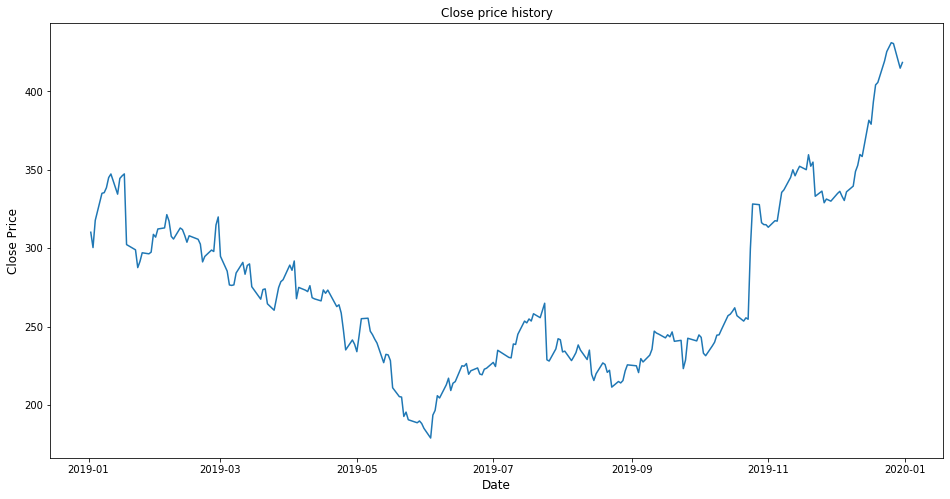

In [4]:
# visualise the price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()

In [5]:
df.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
# support and resistance
supports = []
rounded_close = round(df['Close'],-1)
supports.append(rounded_close.mode()[0])
print(supports)



new_rounded_close = []
for i in range(len(rounded_close)):
    if abs(rounded_close[i] - supports[-1]) > 50:
        new_rounded_close.append(rounded_close[i])

new_rounded_close = pd.Series(new_rounded_close)

print(len(rounded_close))
print(len(new_rounded_close))

new_rounded_close.mode()[0]

[230.0]
252
95


310.0

In [29]:
# moving average
df['zero'] = 0
df['30ma'] = df['Close'].rolling(window=30,min_periods=0,center=True).mean()
df['10ma'] = df['Close'].rolling(window=10,min_periods=0,center=True).mean()
df['5ma'] = df['Close'].rolling(window=5,min_periods=0,center=True).mean()

#df.iat[0,6] = 0

#print(df.iloc[0,6])
#df.head()
#df['10ma'].shift(periods=1)
#df['5ma'].shift(periods=1)

df['Hull'] = (df['5ma']*2 - df['10ma'])
df['hError'] = df['Hull'] - df['Close']

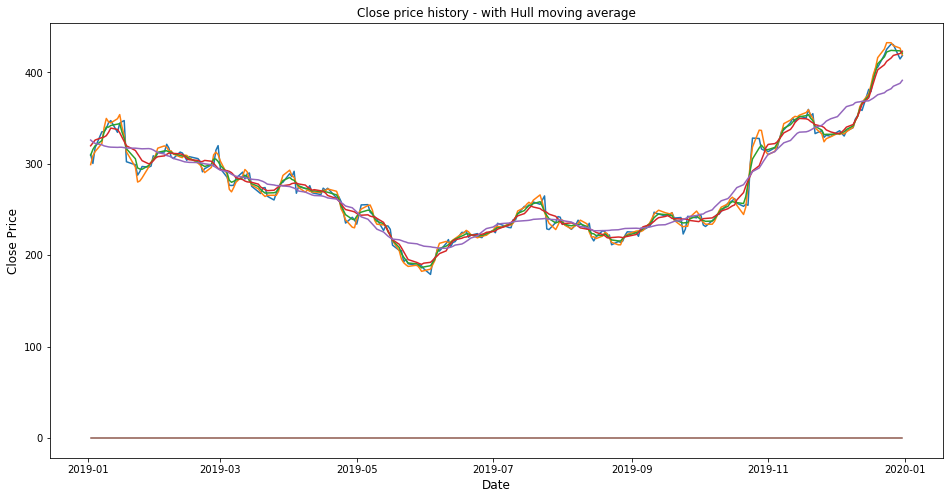

In [31]:
# visualise the price history
plt.figure(figsize=(16,8))
plt.title('Close price history - with Hull moving average')
plt.plot(df['Close'])
#plt.plot(df['rounded_close'])
#plt.plot(df['support'])
plt.plot(df['Hull'])
plt.plot(df['5ma'])
plt.plot(df['10ma'])
plt.plot(df['30ma'])
plt.plot(df['zero'])
#plt.plot(df['hError'])
plt.xlabel('Date', fontsize=12)
plt.ylabel('Close Price', fontsize=12)
plt.show()

In [13]:
# create ohlc array for candlestick plot
ohlc = []
for i in range(len(df)):
    x = [i, df.iloc[i,2], df.iloc[i,0], df.iloc[i,1], df.iloc[i,3], df.iloc[i,4]]
    ohlc.append(x)

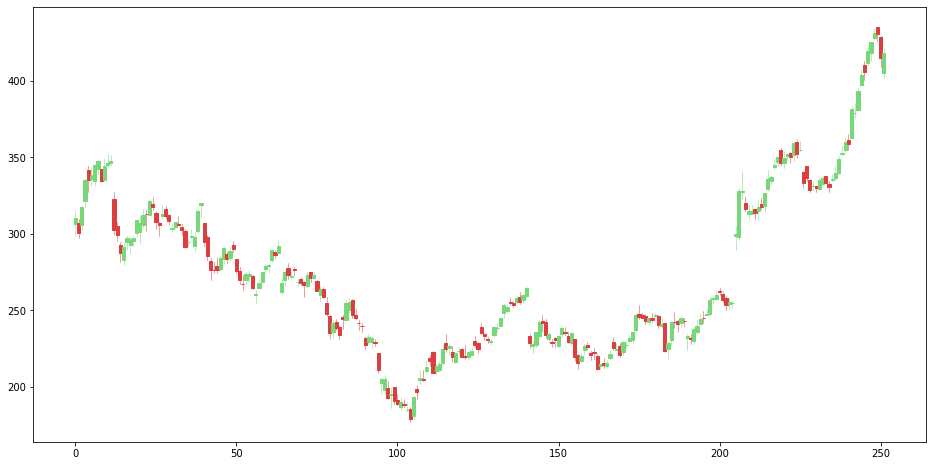

In [18]:
# display candlestick plot
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot2grid((1,1), (0,0))
candlestick_ohlc(ax1, ohlc, width=1, colorup='#77d879', colordown='#db3f3f')
plt.show()

In [26]:
df['Trade_direction'] = 'Bull'

for i in range(len(df)):
    if df.iat[i,2] > df.iat[i,3]:
        df.iat[i,11] = 'Bear'

df

,High,Low,Open,Close,Volume,Adj Close,zero,10ma,5ma,Hull,hError,Trade_direction
Date,,,,,,,,,,,,
2019-01-02,315.130005,298.799988,306.100006,310.119995,11658600,310.119995,0,319.695996,309.389994,299.083993,-11.036003,Bull
2019-01-03,309.399994,297.380005,307.000000,300.359985,6965200,300.359985,0,322.834997,315.782494,308.729991,8.370005,Bear
2019-01-04,318.000000,302.730011,306.000000,317.690002,7394100,317.690002,0,325.997140,319.695996,313.394852,-4.295150,Bull
2019-01-07,336.739990,317.750000,321.720001,334.959991,7551200,334.959991,0,328.654999,325.377997,322.100995,-12.858997,Bull
2019-01-08,344.010010,327.019989,341.959991,335.350006,7008500,335.350006,0,329.293332,334.300000,339.306668,3.956662,Bear
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,425.470001,412.690002,418.359985,425.250000,8054700,425.250000,0,412.059000,422.276001,432.493002,7.243002,Bull
2019-12-26,433.480011,426.350006,427.910004,430.940002,10633900,430.940002,0,415.733334,424.098004,432.462674,1.522672,Bull
2019-12-27,435.309998,426.109985,435.000000,430.380005,9945700,430.380005,0,418.556252,423.920001,429.283751,-1.096254,Bear
